# Tutorial: A Recurrent Variational Autoencoder for Human Motion Synthesis

We model the sequential nature of the task by combining samples from a variational approximation to the intractable posterior and a recurrent neural network (RNN) that synthesizes the motion. In addition, the formulation within a variational inference framework allows us to generate novel motion without having to provide initial frames from an existing sequence. 

## Setup vae_lstm

1. Download the amass dateset
2. Run this tutorial

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from genmotion.algorithm.vae_lstm.models import VAE_LSTM
from genmotion.algorithm.vae_lstm.data_utils import MotionDataset

In [2]:
def fetch_amass(root_dir: str):
    data_lst = []
    for r, d, f in os.walk(root_dir):
        if d == []:
            for file in f:
                data_lst.append(r + "/" + file)
    return data_lst

def transform(sample):
    transformed_sample = {}
    for field in ["trans", "poses", "root_orient"]:
        transformed_sample[field] = np.swapaxes(sample[field][:60], 0,1) # cut to 7200 frame
    return transformed_sample

In [3]:
AMASS_Dataset = MotionDataset("/home/vince/Downloads/HDM05", fetch=fetch_amass, transform=transform)
amass_dataloader = DataLoader(AMASS_Dataset, batch_size=25, shuffle=True, num_workers=0)

ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
model = VAE_LSTM(num_joints=57, input_frame=60)

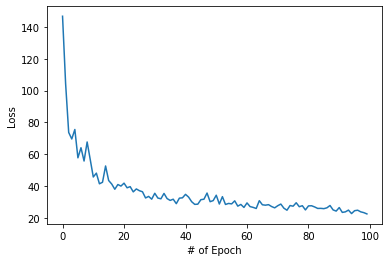

100%|██████████| 100/100 [03:04<00:00,  1.85s/it]

Final loss: 22.44504165649414


In [ ]:
model.train(lr=1e-5, num_epochs=100, train_loader=amass_dataloader)

In [ ]:
torch.save(model.state_dict(), "VAE_LSTM.pt")